<a href="https://colab.research.google.com/github/hsinliangwei/Information-to-data-mining/blob/main/Data_Visualization_Exercise_finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\Large{Data\; Visualization\; 練習題}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 範例資料

In [3]:
df = pd.read_csv("https://github.com/chris1610/pbpython/blob/master/data/Aussie_Wines_Plotting.csv?raw=true", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_color
77,Australia,This medium-bodied Chardonnay features aromas ...,Made With Organic Grapes,86,18.0,South Australia,South Australia,NaN,Joe Czerwinski,@JoeCz,Yalumba 2016 Made With Organic Grapes Chardonn...,Chardonnay,Yalumba,#440154
83,Australia,"Pale copper in hue, this wine exudes passion f...",Jester Sangiovese,86,20.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Mitolo 2016 Jester Sangiovese Rosé (McLaren Vale),Rosé,Mitolo,#450558
123,Australia,The blend is roughly two-thirds Shiraz and one...,Parson's Flat,92,40.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 Parson's Flat Shi...,Shiraz-Cabernet Sauvignon,Henry's Drive Vignerons,#460B5E
191,Australia,"From the little-known region of Padthaway, thi...",The Trial of John Montford,87,30.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 The Trial of John...,Cabernet Sauvignon,Henry's Drive Vignerons,#471163
232,Australia,Lifted cedar and pine notes interspersed with ...,Red Belly Black,85,12.0,South Australia,South Australia,NaN,NaN,NaN,Angove's 2006 Red Belly Black Shiraz (South Au...,Shiraz,Angove's,#471669


## Exercise 1
請畫出資料中points欄位的直方圖，並主動設定分組數量為20

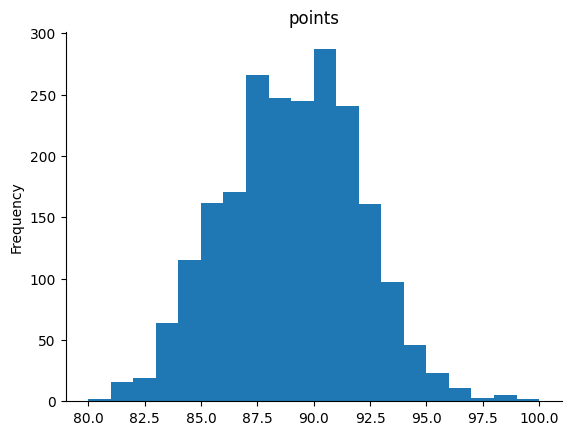

In [5]:
# @title points

from matplotlib import pyplot as plt
df['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Exercise 2
觀察points與price之間的散佈圖

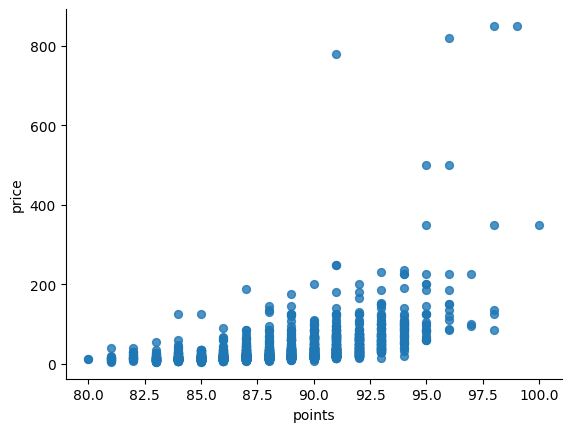

In [7]:
# @title points vs price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='points', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Exercise 3
請計算並畫出df資料中各個region_1出現次數的長條圖，並使用plt.xticks將長條圖標記旋轉60度

(為避免長條圖數量過多，可在整理資料時只篩選前六名)

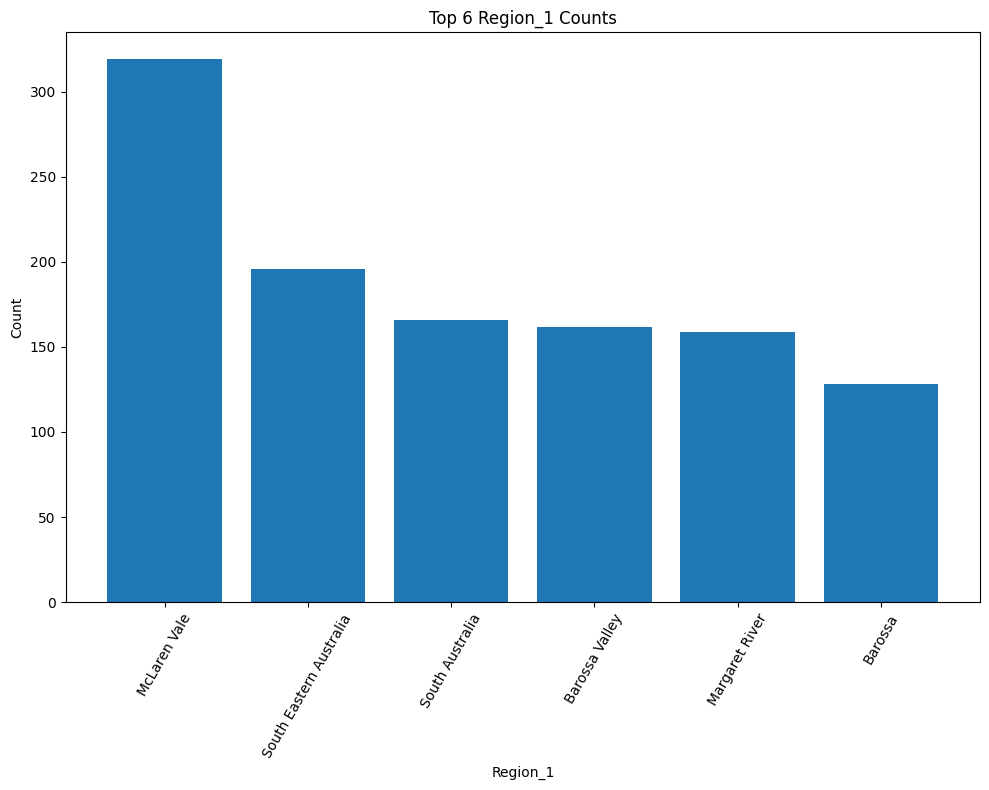

In [11]:
import matplotlib.pyplot as plt

# 計算各個region_1出現次數
region_counts = df['region_1'].value_counts()

# 只篩選前六名
top_regions = region_counts.head(6)

# 畫出長條圖
plt.figure(figsize=(10, 8))
plt.bar(top_regions.index, top_regions.values)
plt.xlabel('Region_1')
plt.ylabel('Count')
plt.title('Top 6 Region_1 Counts')

# 將長條圖標記旋轉60度
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

## Exercise 4
請依照每個省份(province)分別繪製一張points的機率密度函數圖。

註：你可以使用subplot的方式，也可以直接使用FacetGrid作圖

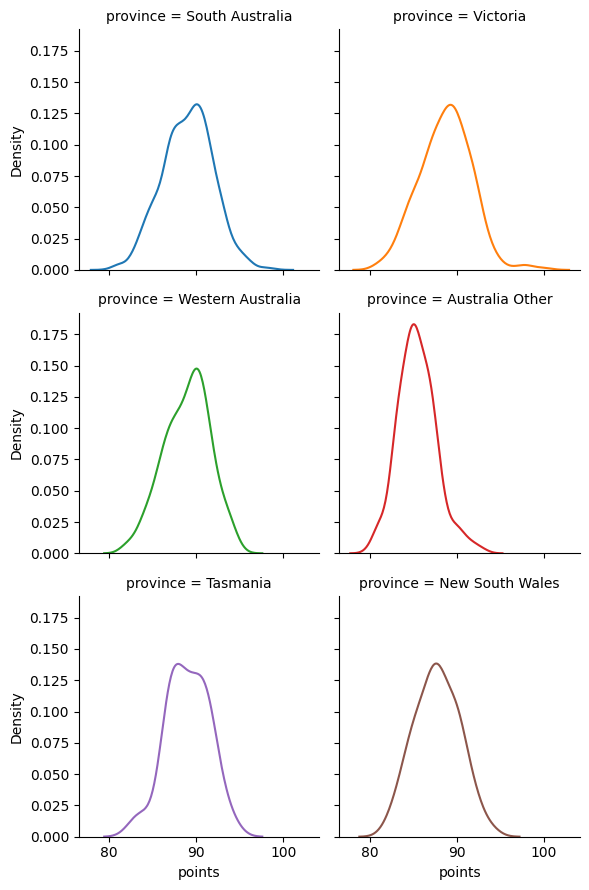

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用FacetGrid繪製
g = sns.FacetGrid(df, col="province", hue="province", col_wrap=2)
g.map(sns.kdeplot, "points")
plt.show()

---

## 範例資料 2

此份資料蒐集了google play store 中約一萬筆App的資料，若對資料敘述有興趣可至以下網站查看更多資訊。

Credit: https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv

In [27]:
df = pd.read_csv('googleplaystore.csv')

# 將評分人數統一改為數字型態
df['Reviews'] = df.Reviews.str.replace('3.0M', '300000').astype('int')

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Exercise 5
請繪製評分分數(Rating)評分人數(Reviews)的散佈圖，並且將不同的App付費類型(Type)以不同顏色標示

- 註：有沒有發現甚麼比較奇怪的事情?

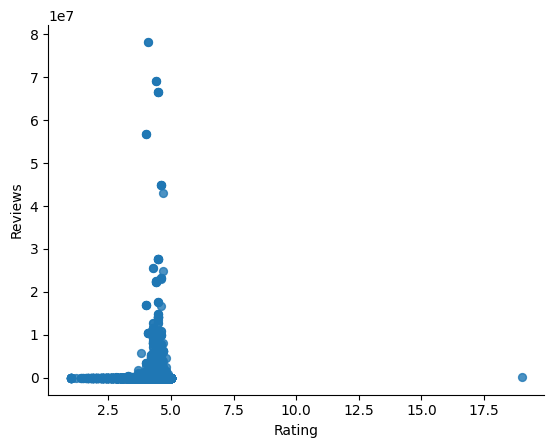

In [36]:
# @title Rating vs Reviews

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Rating', y='Reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
# 註：有沒有發現甚麼比較奇怪的事情?
# 有一些App的評論數(Reviews)非常多，但是評分(Rating)卻很低，
# 這些可能是假帳號灌水的現象。


## Exercise 6

請挑出資料中類別(Category)為FAMILY、GAME、以及TOOLS的App資料，並且分別繪製這三個類型評分分數(Rating)的小提琴圖。

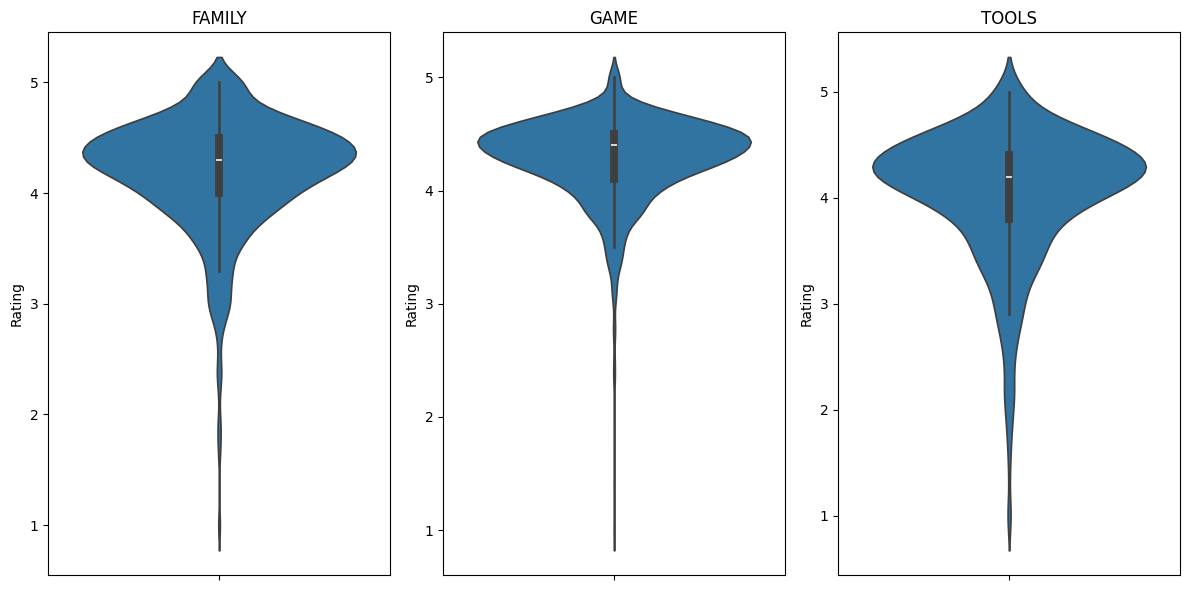

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 挑出類別為FAMILY、GAME、以及TOOLS的App資料
family_df = df[df['Category'] == 'FAMILY']
game_df = df[df['Category'] == 'GAME']
tools_df = df[df['Category'] == 'TOOLS']

# 建立一個新的圖表
plt.figure(figsize=(12, 6))

# 繪製FAMILY類別的評分分數小提琴圖
plt.subplot(1, 3, 1)
sns.violinplot(y='Rating', data=family_df)
plt.title('FAMILY')

# 繪製GAME類別的評分分數小提琴圖
plt.subplot(1, 3, 2)
sns.violinplot(y='Rating', data=game_df)
plt.title('GAME')

# 繪製TOOLS類別的評分分數小提琴圖
plt.subplot(1, 3, 3)
sns.violinplot(y='Rating', data=tools_df)
plt.title('TOOLS')

# 顯示圖表
plt.tight_layout()
plt.show()

## Exercise 7
將資料中付費類型(Type)與年齡層(Content Rating)內各組的平均評分(Rating)繪製成熱力圖。

註：你必須先使用pivot_table方法整理資料

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36027 (\N{CJK UNIFIED IDEOGRAPH-8CBB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

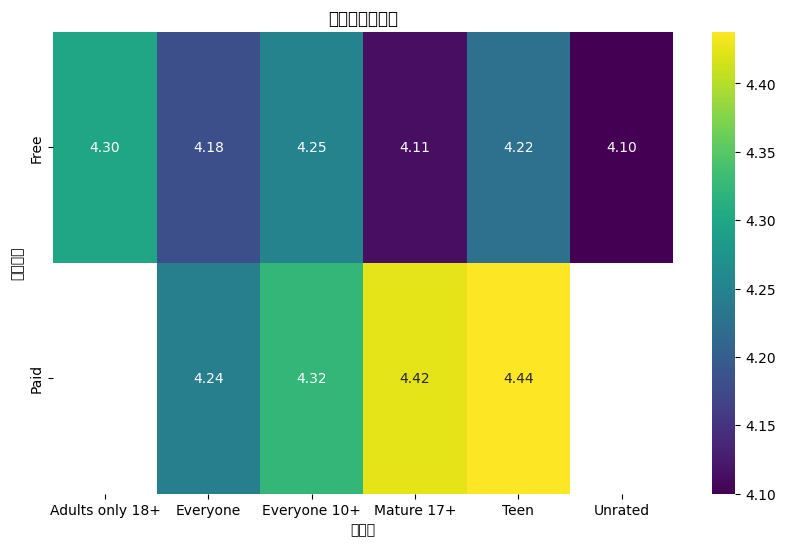

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 使用pivot_table方法整理資料
rating_pivot = pd.pivot_table(df, values='Rating', index='Type', columns='Content Rating', aggfunc='mean')

# 繪製熱力圖
plt.figure(figsize=(10, 6))
sns.heatmap(rating_pivot, annot=True, cmap='viridis', fmt=".2f")
plt.title('平均評分熱力圖')
plt.xlabel('年齡層')
plt.ylabel('付費類型')
plt.show()


## Exercise 8
下圖呈現不同類別與付費類型的App在評分上的差異，圖中的x軸為App類別(Category，只需挑選FAMILY, GAME, TOOLS三類)，y軸為評分分數(Rating)的最小值，顏色則為付費類型(Type)。請繪製出此圖。

<img src="./Slides_image/exercise_8.PNG" width=600/>

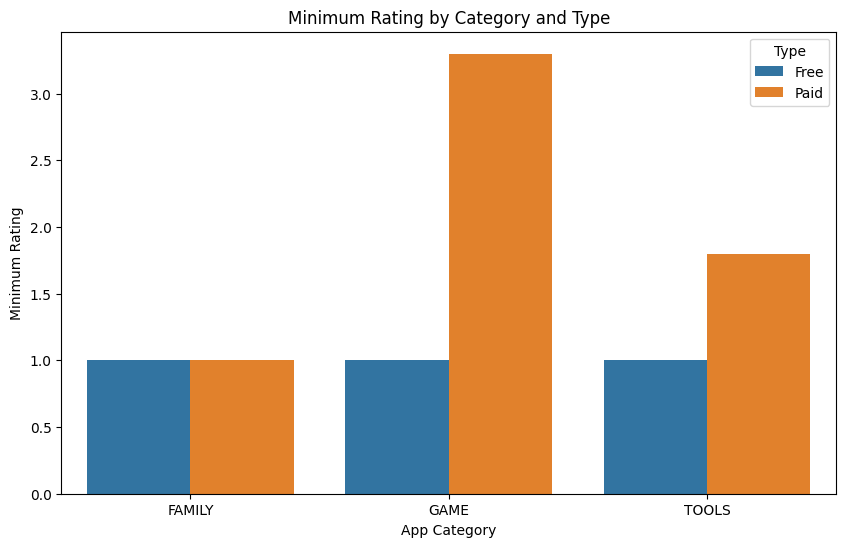

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the desired categories
df_filtered = df[df.Category.isin(['FAMILY', 'GAME', 'TOOLS'])]

# Group by category and type, then calculate the minimum rating for each group
df_grouped = df_filtered.groupby(['Category', 'Type'])['Rating'].min().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Rating', hue='Type', data=df_grouped)
plt.title('Minimum Rating by Category and Type')
plt.xlabel('App Category')
plt.ylabel('Minimum Rating')
plt.show()